In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
apt_train = pd.read_csv("data/apartments_train.csv")

In [6]:
apt_train.head()

id  seller       price  area_total  area_kitchen  area_living  floor  \
0   0     3.0   7139520.0        59.2          12.5         31.0    2.0   
1   1     NaN  10500000.0        88.0          14.2         48.0   18.0   
2   2     3.0   9019650.0        78.5          22.5         40.8   12.0   
3   3     NaN  10500000.0        88.0          14.0         48.0   18.0   
4   4     NaN  13900000.0        78.0          17.0         35.0    7.0   

   rooms  layout  ceiling  bathrooms_shared  bathrooms_private  windows_court  \
0    2.0     NaN     2.65               0.0                2.0            0.0   
1    3.0     1.0      NaN               2.0                0.0            1.0   
2    3.0     NaN     2.65               0.0                2.0            1.0   
3    3.0     NaN      NaN               0.0                2.0            1.0   
4    2.0     1.0     2.90               1.0                0.0            1.0   

   windows_street  balconies  loggias  condition  phones  building_id  
0             1.0        NaN      NaN        NaN     1.0         4076  
1             1.0        1.0      0.0        3.0     1.0         1893  
2             1.0        NaN      NaN        NaN     1.0         5176  
3             1.0        0.0      1.0        2.0     1.0         1893  
4             1.0        0.0      1.0        3.0     1.0         6604

In [7]:
apt_train.dtypes

id                     int64
seller               float64
price                float64
area_total           float64
area_kitchen         float64
area_living          float64
floor                float64
rooms                float64
layout               float64
ceiling              float64
bathrooms_shared     float64
bathrooms_private    float64
windows_court        float64
windows_street       float64
balconies            float64
loggias              float64
condition            float64
phones               float64
building_id            int64
dtype: object

In [8]:
apt_train.describe()

id        seller         price    area_total  area_kitchen  \
count  23285.000000  14455.000000  2.328500e+04  23285.000000  18564.000000   
mean   11642.000000      1.875683  2.355617e+07     74.450999     12.552279   
std     6721.944845      1.089518  5.264393e+07     58.671373      6.565686   
min        0.000000      0.000000  9.000000e+05      9.300000      1.000000   
25%     5821.000000      1.000000  7.490000e+06     42.000000      8.200000   
50%    11642.000000      2.000000  1.064500e+07     59.800000     10.700000   
75%    17463.000000      3.000000  2.050000e+07     84.800000     15.300000   
max    23284.000000      3.000000  2.600000e+09   2181.000000    100.000000   

        area_living         floor         rooms       layout       ceiling  \
count  19403.000000  23285.000000  23285.000000  5643.000000  12192.000000   
mean      38.741367      8.969594      2.189349     1.039695      3.268374   
std       31.398480      8.322039      1.076130     0.351507     10.802728   
min        0.000000      1.000000      1.000000     0.000000      0.000000   
25%       20.000000      3.000000      1.000000     1.000000      2.650000   
50%       30.900000      7.000000      2.000000     1.000000      2.800000   
75%       45.300000     12.000000      3.000000     1.000000      3.000000   
max      900.000000     95.000000      6.000000     2.000000    340.000000   

       bathrooms_shared  bathrooms_private  windows_court  windows_street  \
count      19413.000000       19413.000000   15213.000000    15213.000000   
mean           0.737547           0.662855       0.797147        0.468678   
std            0.781173           0.716888       0.402137        0.499034   
min            0.000000           0.000000       0.000000        0.000000   
25%            0.000000           0.000000       1.000000        0.000000   
50%            1.000000           1.000000       1.000000        0.000000   
75%            1.000000           1.000000       1.000000        1.000000   
max            4.000000           4.000000       1.000000        1.000000   

          balconies       loggias     condition        phones   building_id  
count  12765.000000  12765.000000  13475.000000  23205.000000  23285.000000  
mean       0.556365      0.673090      1.270501      1.162293   4844.089156  
std        0.641257      0.664779      1.017037      0.456937   2790.676698  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      1.000000   2426.000000  
50%        0.000000      1.000000      1.000000      1.000000   4772.000000  
75%        1.000000      1.000000      2.000000      1.000000   7340.000000  
max        4.000000      4.000000      3.000000      2.000000   9735.000000

<AxesSubplot:xlabel='price', ylabel='area_total'>

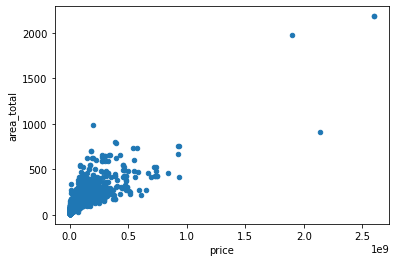

In [9]:
apt_train.plot("price","area_total", "scatter")

<AxesSubplot:>

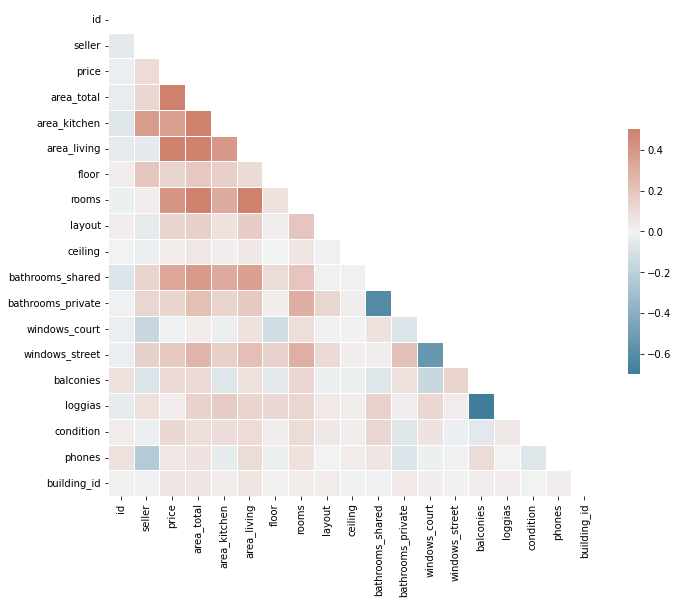

In [10]:
corr = apt_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### price vs rooms

In [11]:
plt.figure()
plt.plot(apt_train.price, apt_train.rooms, "*")
plt.xlabel("Price")
plt.ylabel("Rooms")
plt.show()

In [12]:
apt_train.price.max()

2600000000.0

### Remove some outliers

In [13]:
apt_train.loc[apt_train.price < 1000000000,:].plot("price","area_total", "scatter")

<AxesSubplot:xlabel='price', ylabel='area_total'>

In [14]:
apt_train.loc[apt_train.price < 300000000,:].plot("price","area_total", "scatter")

<AxesSubplot:xlabel='price', ylabel='area_total'>

### boxplot

In [15]:
apt_train.boxplot(column=['price'], by=['rooms'])
plt.title("")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.yscale("log")
plt.show()

In [16]:
apt_train.loc[apt_train.price < 300000000,:].boxplot(column=['price'], by=['rooms'])
plt.title("")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.yscale("log")
plt.show()

# Violoin plot

## Price vs Rooms

### Reduced to 100 000 000

In [17]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('rooms','price', data=apt_train.loc[apt_train.price < 100000000,:], ax = axes)
axes.set_title('Price by rooms')

axes.yaxis.grid(True)
axes.set_xlabel('Rooms')
axes.set_ylabel('Price')

plt.show()

C:\Users\torkj\anaconda3\envs\ML_Kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Reduce to 30 000 000

C:\Users\torkj\anaconda3\envs\ML_Kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


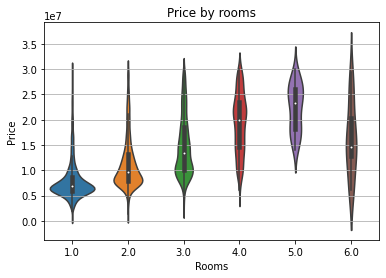

In [18]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('rooms','price', data=apt_train.loc[apt_train.price < 30000000,:], ax = axes)
axes.set_title('Price by rooms')

axes.yaxis.grid(True)
axes.set_xlabel('Rooms')
axes.set_ylabel('Price')

plt.show()

In [19]:
fig, axes = plt.subplots()
# plot violin. 'Scenario' is according to x axis, 
# 'LMP' is y axis, data is your dataframe. ax - is axes instance
sns.violinplot('floor','price', data=apt_train.loc[apt_train.price < 30000000,:], ax = axes)
axes.set_title('Price by floor')

axes.yaxis.grid(True)
axes.set_xlabel('Rooms')
axes.set_ylabel('Price')

plt.show()

C:\Users\torkj\anaconda3\envs\ML_Kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


# Buildings

In [20]:
buildings = pd.read_csv("data/buildings_train.csv")

In [21]:
buildings.head()

id  new   latitude  longitude  district                     street  \
0   264  0.0  55.518117  37.355139      11.0  улица 1-я Нововатутинская   
1  6079  0.0  55.641920  37.352156       7.0                  мкр. 10-й   
2  5829  0.0  55.770011  37.386220       7.0           Рублевское шоссе   
3  5758  0.0  55.739934  37.426070       7.0           Рублевское шоссе   
4  6761  0.0  55.649921  37.467994       7.0    улица Академика Анохина   

  address  constructed  material  stories  elevator_without  \
0       3       2019.0       2.0     12.0               1.0   
1   к1014       1981.0       3.0     22.0               0.0   
2      68       2002.0       3.0     24.0               0.0   
3    93К2       2011.0       3.0     17.0               0.0   
4    58К2       2005.0       3.0     22.0               0.0   

   elevator_passenger  elevator_service  parking  garbage_chute  heating  
0                 1.0               1.0      0.0            1.0      3.0  
1                 1.0               1.0      NaN            1.0      0.0  
2                 1.0               1.0      NaN            NaN      0.0  
3                 1.0               1.0      NaN            1.0      0.0  
4                 1.0               1.0      NaN            0.0      0.0

In [22]:
buildings.isna().any()

id                    False
new                    True
latitude              False
longitude             False
district               True
street                False
address               False
constructed            True
material               True
stories               False
elevator_without       True
elevator_passenger     True
elevator_service       True
parking                True
garbage_chute          True
heating                True
dtype: bool

In [23]:
print(f'All apartments have an associated building: {apt_train.building_id.isin(buildings.id).all()}')
data = pd.merge(apt_train, buildings.set_index('id'), left_on='building_id', right_index=True)
data.head()

All apartments have an associated building: True


id  seller      price  area_total  area_kitchen  area_living  floor  \
0      0     3.0  7139520.0        59.2          12.5         31.0    2.0   
12    12     3.0  4045140.0        19.8           5.2          9.6   17.0   
55    55     3.0  9500240.0        79.7          17.0         41.5    9.0   
104  104     3.0  4326660.0        23.4           6.1         11.3    9.0   
106  106     3.0  4333980.0        23.8           6.1         11.3    9.0   

     rooms  layout  ceiling  ...  address  constructed  material  stories  \
0      2.0     NaN     2.65  ...   к2.5/2       2021.0       3.0      9.0   
12     1.0     NaN     2.65  ...   к2.5/2       2021.0       3.0      9.0   
55     3.0     NaN     2.65  ...   к2.5/2       2021.0       3.0      9.0   
104    1.0     NaN     2.65  ...   к2.5/2       2021.0       3.0      9.0   
106    1.0     NaN     2.65  ...   к2.5/2       2021.0       3.0      9.0   

     elevator_without  elevator_passenger  elevator_service  parking  \
0                 0.0                 1.0               1.0      1.0   
12                0.0                 1.0               1.0      1.0   
55                0.0                 1.0               1.0      1.0   
104               0.0                 1.0               1.0      1.0   
106               0.0                 1.0               1.0      1.0   

     garbage_chute  heating  
0              NaN      NaN  
12             NaN      NaN  
55             NaN      NaN  
104            NaN      NaN  
106            NaN      NaN  

[5 rows x 34 columns]

<AxesSubplot:>

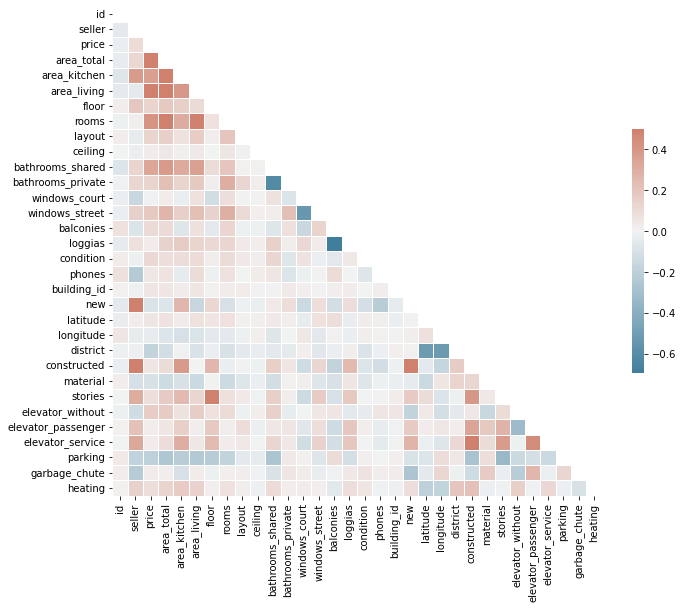

In [24]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Distric vs price

In [25]:
fig, axes = plt.subplots()

sns.violinplot('district','price', data=data.loc[data.price < 60000000,:], ax = axes)
axes.set_title('Price by floor')

axes.yaxis.grid(True)
axes.set_xlabel('District')
axes.set_ylabel('Price')

plt.show()

C:\Users\torkj\anaconda3\envs\ML_Kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [26]:
districts = data.district.unique()
districts

array([11.,  2.,  6., nan,  5.,  0.,  7.,  3.,  4.,  8.,  1., 10.,  9.])

In [27]:
print(f"there are {data.loc[data.district.isna(),:].__len__()} rows that dont have district")

there are 130 rows that dont have district


And it seems like they are all in the same block

In [28]:
data.loc[data.district.isna(),:]

id  seller      price  area_total  area_kitchen  area_living  floor  \
5          5     3.0  5464800.0        36.0           5.8         21.6    1.0   
27        27     3.0  3910450.0        19.7           5.1          9.7    2.0   
31        31     3.0  4568400.0        27.0           6.9         12.7   10.0   
40        40     3.0  6035600.0        39.5          19.6         11.2   15.0   
46        46     3.0  7801000.0        72.5          12.6         41.9    2.0   
...      ...     ...        ...         ...           ...          ...    ...   
22356  22356     3.0  6396390.0        42.9          17.2         11.6    3.0   
23114  23114     3.0  6290010.0        42.3          16.0         15.3    6.0   
23145  23145     3.0  8319150.0        69.5          11.3         28.0   11.0   
23158  23158     3.0  4797900.0        27.0           6.9         12.7   14.0   
23199  23199     3.0  7488800.0        59.2          20.8         23.0    2.0   

       rooms  layout  ceiling  ...  address  constructed  material  stories  \
5        2.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
27       1.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
31       1.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
40       1.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
46       3.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
...      ...     ...      ...  ...      ...          ...       ...      ...   
22356    1.0     NaN     2.89  ...      5к1       2021.0       3.0      9.0   
23114    1.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
23145    2.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
23158    1.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   
23199    2.0     NaN     2.65  ...      5к1       2021.0       3.0      9.0   

       elevator_without  elevator_passenger  elevator_service  parking  \
5                   0.0                 1.0               1.0      1.0   
27                  0.0                 1.0               1.0      1.0   
31                  0.0                 1.0               1.0      1.0   
40                  0.0                 1.0               1.0      1.0   
46                  0.0                 1.0               1.0      1.0   
...                 ...                 ...               ...      ...   
22356               0.0                 1.0               1.0      1.0   
23114               0.0                 1.0               1.0      1.0   
23145               0.0                 1.0               1.0      1.0   
23158               0.0                 1.0               1.0      1.0   
23199               0.0                 1.0               1.0      1.0   

       garbage_chute  heating  
5                NaN      1.0  
27               NaN      1.0  
31               NaN      1.0  
40               NaN      1.0  
46               NaN      1.0  
...              ...      ...  
22356            NaN      1.0  
23114            NaN      1.0  
23145            NaN      1.0  
23158            NaN      1.0  
23199            NaN      1.0  

[130 rows x 34 columns]

### Stories vs price

C:\Users\torkj\anaconda3\envs\ML_Kaggle\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


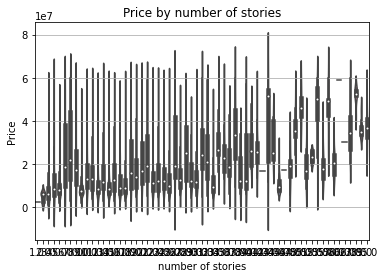

In [29]:
fig, axes = plt.subplots()

sns.violinplot('stories','price', data=data.loc[data.price < 60000000,:], ax = axes)
axes.set_title('Price by number of stories')

axes.yaxis.grid(True)
axes.set_xlabel('number of stories')
axes.set_ylabel('Price')

plt.show()

### price by stores/floor

In [30]:
data["stories_per_floor"] = data["stories"] / data["floor"]

In [31]:
data

id  seller       price  area_total  area_kitchen  area_living  \
0          0     3.0   7139520.0        59.2          12.5        31.00   
12        12     3.0   4045140.0        19.8           5.2         9.60   
55        55     3.0   9500240.0        79.7          17.0        41.50   
104      104     3.0   4326660.0        23.4           6.1        11.30   
106      106     3.0   4333980.0        23.8           6.1        11.30   
...      ...     ...         ...         ...           ...          ...   
23228  23228     0.0  12500000.0        73.0          14.5        24.16   
23229  23229     NaN   5250000.0        35.7           9.0        26.70   
23248  23248     NaN  13500000.0        58.1          18.3        30.70   
23250  23250     1.0  18900000.0       116.0          12.6          NaN   
23271  23271     NaN  10890000.0        45.7          11.8        21.80   

       floor  rooms  layout  ceiling  ...  constructed  material  stories  \
0        2.0    2.0     NaN     2.65  ...       2021.0       3.0      9.0   
12      17.0    1.0     NaN     2.65  ...       2021.0       3.0      9.0   
55       9.0    3.0     NaN     2.65  ...       2021.0       3.0      9.0   
104      9.0    1.0     NaN     2.65  ...       2021.0       3.0      9.0   
106      9.0    1.0     NaN     2.65  ...       2021.0       3.0      9.0   
...      ...    ...     ...      ...  ...          ...       ...      ...   
23228    2.0    2.0     1.0     2.90  ...       2016.0       NaN      6.0   
23229    8.0    1.0     NaN      NaN  ...       1991.0       4.0     16.0   
23248   17.0    2.0     2.0     2.75  ...       2011.0       3.0     17.0   
23250    2.0    3.0     NaN      NaN  ...       2001.0       NaN      6.0   
23271    9.0    1.0     NaN     2.70  ...       2005.0       3.0     22.0   

       elevator_without  elevator_passenger  elevator_service  parking  \
0                   0.0                 1.0               1.0      1.0   
12                  0.0                 1.0               1.0      1.0   
55                  0.0                 1.0               1.0      1.0   
104                 0.0                 1.0               1.0      1.0   
106                 0.0                 1.0               1.0      1.0   
...                 ...                 ...               ...      ...   
23228               0.0                 1.0               1.0      NaN   
23229               0.0                 1.0               0.0      NaN   
23248               0.0                 1.0               1.0      NaN   
23250               NaN                 NaN               NaN      NaN   
23271               0.0                 1.0               1.0      NaN   

       garbage_chute  heating  stories_per_floor  
0                NaN      NaN           4.500000  
12               NaN      NaN           0.529412  
55               NaN      NaN           1.000000  
104              NaN      NaN           1.000000  
106              NaN      NaN           1.000000  
...              ...      ...                ...  
23228            NaN      0.0           3.000000  
23229            1.0      0.0           2.000000  
23248            1.0      0.0           1.000000  
23250            NaN      NaN           3.000000  
23271            0.0      0.0           2.444444  

[23285 rows x 35 columns]

In [32]:
df = data.loc[(data.price < 900000000) & (data.stories > 15),:]

fig, axes = plt.subplots()

axes.scatter(df.price, df.stories_per_floor)
axes.set_title('Price by number of stories/floor')

axes.yaxis.grid(True)
axes.set_xlabel('Price')
axes.set_ylabel('Number of stories/floor number')

plt.show()

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost.sklearn import XGBRegressor
import xgboost
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, GroupKFold, KFold, cross_val_score, StratifiedKFold, GroupShuffleSplit
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_log_error

from DataCleaning import *
from Tools import haversine

In [34]:
train_apt = pd.read_csv("data/apartments_train.csv")
test_apt = pd.read_csv("data/apartments_test.csv")
train_buil = pd.read_csv("data/buildings_train.csv")
test_buil = pd.read_csv("data/buildings_test.csv")

train_edited = pd.read_csv("apartments_filtered.csv")

train_merged = pd.merge(train_apt, train_buil.set_index('id'), how="left", left_on='building_id', right_index=True)
test_merged = pd.merge(test_apt, test_buil.set_index('id'), how="left", left_on='building_id', right_index=True)
train_merged_full = train_merged.copy()
# remove outliers
drop_outliers(train_merged,"price")


# clean mean imputed features here
clean_feature_ceiling(train_merged, test_merged)
clean_feature_new(train_merged)
clean_feature_new(test_merged)
train_merged, test_merged = clean_feature_constructed(train_merged, test_merged)
train_merged = clean_feature_heating(train_merged)
test_merged = clean_feature_heating(test_merged)

# create new feature
train_merged.loc[:,"dist_from_center"] = haversine([train_merged.latitude.values, train_merged.longitude.values],unit="km")
test_merged.loc[:,"dist_from_center"] = haversine([test_merged.latitude.values, test_merged.longitude.values],unit="km")


In [35]:
train_inds, test_inds = next(GroupShuffleSplit(test_size=.10, n_splits=2, random_state = 7).split(train_merged, groups=train_merged.building_id))

train = train_merged.iloc[train_inds]
test = train_merged.iloc[test_inds]

In [36]:
train.columns

Index(['id', 'seller', 'price', 'area_total', 'area_kitchen', 'area_living',
       'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared',
       'bathrooms_private', 'windows_court', 'windows_street', 'balconies',
       'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude',
       'longitude', 'district', 'street', 'address', 'constructed', 'material',
       'stories', 'elevator_without', 'elevator_passenger', 'elevator_service',
       'parking', 'garbage_chute', 'age_very_new', 'age_new', 'age_old',
       'age_very_old', 'age_nan', 'heating_1.0', 'heating_2.0', 'heating_nan',
       'dist_from_center'],
      dtype='object')

In [37]:

def get_mean(df0: pd.DataFrame, df1: pd.DataFrame, column: str)-> float:
    return (df0[column].sum() + df1[column].sum()) / (df0[column].count() + df1[column].count())

In [38]:
test_merged.loc[test_merged.dist_from_center.isna(),"dist_from_center"] = get_mean(train_merged, test_merged, "dist_from_center")

In [39]:
train_merged.columns

Index(['id', 'seller', 'price', 'area_total', 'area_kitchen', 'area_living',
       'floor', 'rooms', 'layout', 'ceiling', 'bathrooms_shared',
       'bathrooms_private', 'windows_court', 'windows_street', 'balconies',
       'loggias', 'condition', 'phones', 'building_id', 'new', 'latitude',
       'longitude', 'district', 'street', 'address', 'constructed', 'material',
       'stories', 'elevator_without', 'elevator_passenger', 'elevator_service',
       'parking', 'garbage_chute', 'age_very_new', 'age_new', 'age_old',
       'age_very_old', 'age_nan', 'heating_1.0', 'heating_2.0', 'heating_nan',
       'dist_from_center'],
      dtype='object')

# Batrooms

In [40]:
train[(train.bathrooms_shared == train.bathrooms_private)&(train.bathrooms_private.isna() == False)].bathrooms_shared

11       1.0
29       1.0
43       1.0
59       1.0
76       1.0
        ... 
23190    1.0
23201    1.0
23249    1.0
23264    1.0
23269    1.0
Name: bathrooms_shared, Length: 1233, dtype: float64

In [41]:
fig, axes = plt.subplots()
sns.violinplot(x='bathrooms_private',y='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='bathrooms_private', ylabel='price'>

In [42]:
fig, axes = plt.subplots()
sns.violinplot(x='bathrooms_shared',y='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='bathrooms_shared', ylabel='price'>

In [43]:
fig, axes = plt.subplots()
sns.histplot(x='bathrooms_shared', data=train_merged, ax = axes)

<AxesSubplot:xlabel='bathrooms_shared', ylabel='Count'>

In [44]:
train_merged["bathrooms_sum"] = train_merged.bathrooms_shared + train_merged.bathrooms_private
test_merged["bathrooms_sum"] = test_merged.bathrooms_shared + test_merged.bathrooms_private

In [45]:
fig, axes = plt.subplots()
sns.violinplot(x='bathrooms_sum',y='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='bathrooms_sum', ylabel='price'>

<AxesSubplot:xlabel='bathrooms_sum', ylabel='price'>

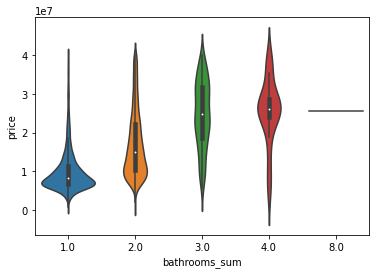

In [46]:
fig, axes = plt.subplots()
sns.violinplot(x='bathrooms_sum',y='price', data=train_merged, ax = axes)

In [47]:
train_merged.loc[train_merged.bathrooms_private >=1,"bathrooms_sum"] += 1

## fill na with mean rounded to closest integer = 1

In [48]:
train_merged.loc[train_merged.bathrooms_private.isna(),"bathrooms_private"] = 1
train_merged.loc[train_merged.bathrooms_shared.isna(),"bathrooms_shared"] = 1

In [49]:
test_merged.bathrooms_shared.describe()

count    8220.000000
mean        0.776642
std         0.811608
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: bathrooms_shared, dtype: float64

# Loggias and Balconies

<AxesSubplot:xlabel='loggias', ylabel='price'>

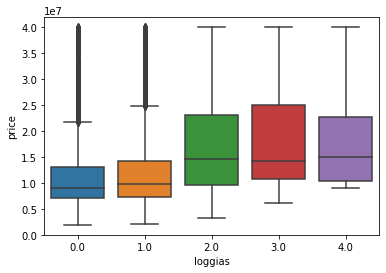

In [50]:
fig, axes = plt.subplots()
sns.boxplot(x='loggias',y='price', data=train_merged, ax = axes)

In [51]:
fig, axes = plt.subplots()
sns.boxplot(x='balconies',y='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='balconies', ylabel='price'>

In [52]:
train_merged.loc[train_merged.balconies.isna(),["balconies","loggias"]] = 0
train_merged["bal_log_sum"] = train_merged.loggias + train_merged.balconies

In [53]:
fig, axes = plt.subplots()
sns.histplot(x='bal_log_sum',y='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='bal_log_sum', ylabel='price'>

In [54]:
train_merged[train_merged.loggias == 2].building_id

59       5993
381      1371
415      2086
425      2969
495      3655
         ... 
23067    1143
23100    2974
23226    8191
23240     715
23265    5404
Name: building_id, Length: 765, dtype: int64

In [55]:
train_merged.loc[train_merged.building_id==8191,["loggias", "floor","balconies"]]

loggias  floor  balconies
2356       0.0    2.0        1.0
16639      1.0    7.0        0.0
20366      1.0    7.0        0.0
23226      2.0    5.0        0.0
23227      1.0    9.0        0.0

<AxesSubplot:xlabel='floor', ylabel='Count'>

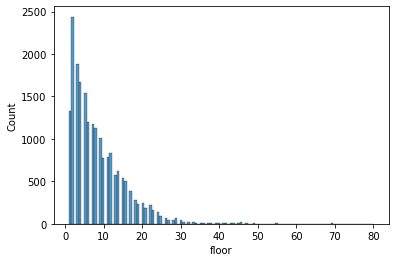

In [56]:
fig, axes = plt.subplots()
sns.histplot(x='floor', data=train_merged, ax = axes)

In [57]:
train_merged.floor.describe()

count    20440.000000
mean         8.568102
std          7.267317
min          1.000000
25%          3.000000
50%          7.000000
75%         12.000000
max         80.000000
Name: floor, dtype: float64

<AxesSubplot:xlabel='seller', ylabel='price'>

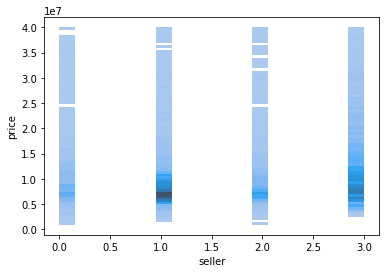

In [58]:
fig, axes = plt.subplots()
sns.histplot(x='seller',y="price", data=train_merged, ax = axes)

In [59]:
fig, axes = plt.subplots()
sns.histplot(x='condition', data=test_merged, ax = axes)


<AxesSubplot:xlabel='condition', ylabel='Count'>

<AxesSubplot:xlabel='material', ylabel='area_total'>

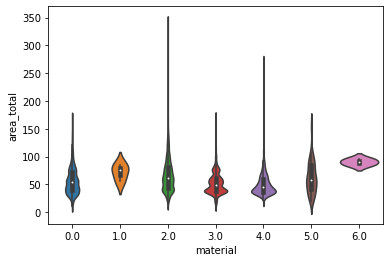

In [60]:
fig, axes = plt.subplots()
sns.violinplot(x='material',y='area_total', data=train_merged, ax = axes)

In [61]:
XGB_BaseModel = XGBRegressor(seed=47, verbosity=1, tree_method = "hist", n_estimators=50)

pipe = Pipeline(
    [
        #("scaler", StandardScaler()),
        ('clf', XGB_BaseModel)
    ]
)

# parameters to check
xgb_params={
    'clf__n_estimators': range(50, 100, 10),
    'clf__max_depth':range(5, 10, 1),
}

In [62]:
groups = train.building_id.to_numpy()

In [63]:
inner_cv = StratifiedKFold(n_splits=4)
outer_cv = GroupKFold(n_splits=10)


[nan  3.  2.  0.  1.]



<AxesSubplot:xlabel='condition', ylabel='price'>

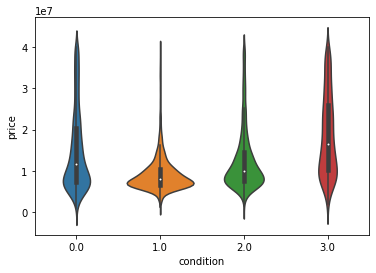

In [64]:
print(train_merged.condition.unique())
print()
fig, axes = plt.subplots()
sns.violinplot(x='condition',y='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='area_total', ylabel='Count'>

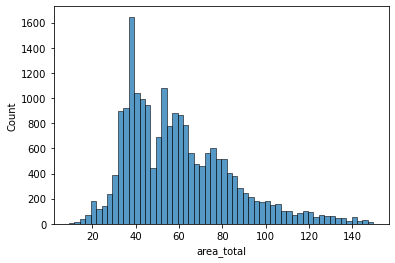

In [65]:
fig, axes = plt.subplots()
sns.histplot(x='area_total', data=train_merged[train_merged.area_total<150], ax = axes)

In [66]:
train_merged[train_merged.area_total>150]

id  seller       price  area_total  area_kitchen  area_living  \
465      465     NaN  35000000.0       173.0          20.0          NaN   
613      613     NaN  33500000.0       260.0          20.0         80.0   
619      619     NaN  39900000.0       173.0          20.0         80.0   
836      836     0.0  32000000.0       180.0          20.0        110.0   
1175    1175     3.0  23746000.0       153.2          19.6         89.4   
...      ...     ...         ...         ...           ...          ...   
21676  21676     3.0  30446529.0       166.8           NaN          NaN   
22047  22047     NaN  30000000.0       155.0          30.0         82.0   
22055  22055     NaN  23500000.0       152.0          15.0        101.0   
22778  22778     0.0  29990000.0       163.4          16.0         95.0   
23006  23006     2.0  39500000.0       192.0          20.2        113.0   

       floor  rooms  layout  ceiling  ...  age_new  age_old  age_very_old  \
465     38.0    4.0     NaN  3.10000  ...        1        0             0   
613     25.0    3.0     NaN  3.10000  ...        1        0             0   
619     15.0    4.0     NaN  3.10000  ...        1        0             0   
836     20.0    3.0     NaN  2.84389  ...        1        0             0   
1175     8.0    3.0     NaN  2.84389  ...        1        0             0   
...      ...    ...     ...      ...  ...      ...      ...           ...   
21676   40.0    3.0     NaN  2.84389  ...        0        0             0   
22047    5.0    4.0     NaN  3.10000  ...        0        0             0   
22055    1.0    5.0     NaN  2.84389  ...        0        1             0   
22778    3.0    4.0     1.0  2.84389  ...        0        0             1   
23006   22.0    4.0     NaN  6.45000  ...        0        0             0   

       age_nan  heating_1.0  heating_2.0  heating_nan  dist_from_center  \
465          0            1            0            0         11.118203   
613          0            1            0            0         12.273902   
619          0            1            0            0         11.118203   
836          0            1            0            0         10.427196   
1175         0            1            0            0         13.023921   
...        ...          ...          ...          ...               ...   
21676        0            0            0            1          9.242309   
22047        0            1            0            0          9.034070   
22055        0            1            0            0         20.604808   
22778        0            1            0            0          9.862349   
23006        0            1            0            0         12.099739   

       bathrooms_sum  bal_log_sum  
465              2.0          0.0  
613              2.0          0.0  
619              2.0          0.0  
836              2.0          2.0  
1175             2.0          1.0  
...              ...          ...  
21676            NaN          0.0  
22047            3.0          2.0  
22055            3.0          1.0  
22778            4.0          3.0  
23006            1.0          2.0  

[122 rows x 44 columns]

In [67]:
train_merged_full[train_merged_full.area_total>150]

id  seller        price  area_total  area_kitchen  area_living  \
101      101     NaN  130001970.0      159.00           NaN          NaN   
174      174     3.0  178050000.0      236.91           NaN          NaN   
458      458     NaN   46000000.0      226.00          21.0        142.0   
459      459     NaN  100000000.0      250.30          25.0        154.0   
465      465     NaN   35000000.0      173.00          20.0          NaN   
...      ...     ...          ...         ...           ...          ...   
23263  23263     NaN   85000000.0      170.00          31.4         82.0   
23268  23268     NaN  149600000.0      205.00          25.0        160.0   
23270  23270     3.0   90513150.0      209.40           NaN          NaN   
23278  23278     3.0   80291302.0      209.72           NaN          NaN   
23279  23279     3.0  157500000.0      355.40           NaN          NaN   

       floor  rooms  layout  ceiling  ...  address  constructed  material  \
101      6.0    4.0     NaN      3.1  ...      7к1       2012.0       2.0   
174      1.0    1.0     NaN      4.2  ...    23АС1       2021.0       2.0   
458      6.0    5.0     1.0      3.3  ...       78       2011.0       2.0   
459      5.0    6.0     NaN      NaN  ...      79В       2011.0       2.0   
465     38.0    4.0     NaN      3.1  ...       78       2011.0       2.0   
...      ...    ...     ...      ...  ...      ...          ...       ...   
23263    3.0    4.0     NaN      NaN  ...        3       2019.0       NaN   
23268    5.0    5.0     NaN      NaN  ...    16/23       2010.0       2.0   
23270   47.0    4.0     NaN      NaN  ...  вл17-18       2020.0       2.0   
23278   32.0    4.0     NaN      NaN  ...  вл17-18       2020.0       2.0   
23279   33.0    5.0     NaN      NaN  ...      79В       2011.0       2.0   

       stories  elevator_without  elevator_passenger  elevator_service  \
101       10.0               1.0                 1.0               1.0   
174        3.0               1.0                 0.0               0.0   
458       48.0               0.0                 1.0               1.0   
459       32.0               1.0                 1.0               1.0   
465       48.0               0.0                 1.0               1.0   
...        ...               ...                 ...               ...   
23263     10.0               0.0                 1.0               1.0   
23268      7.0               1.0                 1.0               1.0   
23270     63.0               1.0                 1.0               1.0   
23278     63.0               1.0                 1.0               1.0   
23279     32.0               1.0                 1.0               1.0   

       parking  garbage_chute  heating  
101        NaN            1.0      NaN  
174        0.0            NaN      NaN  
458        0.0            1.0      0.0  
459        0.0            0.0      0.0  
465        0.0            1.0      0.0  
...        ...            ...      ...  
23263      0.0            1.0      NaN  
23268      0.0            1.0      3.0  
23270      0.0            1.0      0.0  
23278      0.0            1.0      0.0  
23279      0.0            0.0      0.0  

[1604 rows x 34 columns]

In [68]:
fig, axes = plt.subplots()
sns.histplot(x='price', data=train_merged_full, ax = axes)


<AxesSubplot:xlabel='price', ylabel='Count'>

In [69]:
fig, axes = plt.subplots()
sns.histplot(x='price', data=train_merged_full[train_merged_full.price < 55000000.0], ax = axes,log_scale=10)
print(train_merged.price.mean() + train_merged.price.std() *3)

35814867.509748645


In [70]:
fig, axes = plt.subplots()
sns.histplot(x='price', data=train_merged, ax = axes)

<AxesSubplot:xlabel='price', ylabel='Count'>

In [71]:
list(train_merged_full.price.sort_values())[-2000]

55000000.0

In [72]:
fig, axes = plt.subplots()
sns.histplot(x='area_total', data=train_merged, ax = axes)

<AxesSubplot:xlabel='area_total', ylabel='Count'>

In [73]:
train_merged.area_total

0         59.2
1         88.0
2         78.5
3         88.0
4         78.0
         ...  
23280     65.0
23281     56.9
23282     73.4
23283    100.8
23284     57.7
Name: area_total, Length: 20440, dtype: float64

In [74]:
fig, axes = plt.subplots()
sns.histplot(x='area_total', data=test_merged[test_merged.area_total<500], ax = axes)

<AxesSubplot:xlabel='area_total', ylabel='Count'>

In [75]:
cutoff = 500
print(test_merged[(test_merged.area_total > cutoff)].__len__())
print(train_merged[(train_merged.area_total > cutoff)].__len__())
print(train_merged_full[(train_merged_full.area_total > cutoff)].__len__())

16
0
41


In [76]:
train_merged["area_livingbytotal"] = train_merged.area_living.divide(train_merged.area_total)

In [77]:
mask = (train_merged.area_living > train_merged.area_total)
train_merged.loc[mask,["area_living"]] = train_merged.loc[mask,["area_total"]]

In [78]:
train_merged.loc[train_merged.area_livingbytotal>1,["area_living","area_total","area_livingbytotal"]]

area_living  area_total  area_livingbytotal
514            NaN        37.0            2.162162
515            NaN        32.0            2.500000
517            NaN        77.2            1.036269
523            NaN        77.0            1.038961
536            NaN        23.3            3.433476
...            ...         ...                 ...
21341          NaN        60.0            1.116667
21804          NaN        32.0            1.718750
22033          NaN        32.7            1.131498
22395          NaN        21.2            1.250000
22656          NaN        40.6            1.098522

[129 rows x 3 columns]

In [79]:
train_merged["area_livingbytotal"].describe()

count    17734.000000
mean         0.544080
std          0.184141
min          0.000000
25%          0.467703
50%          0.544681
75%          0.613430
max          9.982143
Name: area_livingbytotal, dtype: float64

In [80]:
fig, axes = plt.subplots()
sns.histplot(x="area_livingbytotal", data=train_merged, ax = axes)

<AxesSubplot:xlabel='area_livingbytotal', ylabel='Count'>

<AxesSubplot:xlabel='area_kitchen', ylabel='price'>

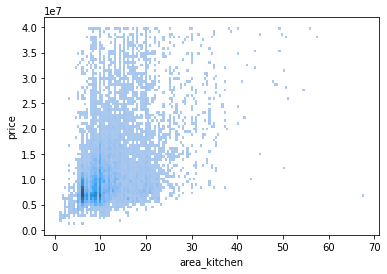

In [81]:
fig, axes = plt.subplots()
sns.histplot(x="area_kitchen",y="price", data=train_merged, ax = axes)

<AxesSubplot:xlabel='material', ylabel='price'>

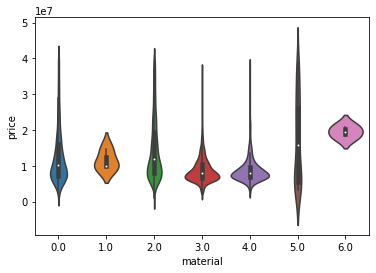

In [82]:
fig, axes = plt.subplots()
sns.violinplot(x="material",y="price", data=train_merged, ax = axes)

In [83]:
test_merged[test_merged.material == 6]

id  seller  area_total  area_kitchen  area_living  floor  rooms  \
1527  24812     1.0        26.2           4.0         18.0    1.0    1.0   
1529  24814     1.0        28.5           6.0         20.0    1.0    1.0   
3416  26701     1.0        27.3           5.0         20.0    1.0    1.0   
3537  26822     1.0        18.5           4.0         10.0    1.0    1.0   
3540  26825     1.0        26.0           4.0         18.0    1.0    1.0   
8869  32154     0.0        51.0           8.0         31.0    4.0    2.0   

      layout  ceiling  bathrooms_shared  ...  age_very_new  age_new  age_old  \
1527     NaN      4.0               1.0  ...             0        0        0   
1529     NaN      4.0               1.0  ...             0        0        0   
3416     NaN      4.0               1.0  ...             0        0        0   
3537     NaN      3.6               1.0  ...             0        0        0   
3540     NaN      4.0               1.0  ...             0        0        0   
8869     0.0      3.0               0.0  ...             0        0        0   

      age_very_old  age_nan  heating_1.0  heating_2.0  heating_nan  \
1527             1        0            1            0            0   
1529             1        0            1            0            0   
3416             1        0            1            0            0   
3537             1        0            1            0            0   
3540             1        0            1            0            0   
8869             1        0            1            0            0   

      dist_from_center  bathrooms_sum  
1527          7.209833            1.0  
1529          7.209833            1.0  
3416          7.209833            1.0  
3537          7.209833            1.0  
3540          7.209833            1.0  
8869          7.209833            1.0  

[6 rows x 42 columns]

In [84]:
test_merged.material.unique()

array([ 2.,  3., nan,  0.,  4.,  5.,  6.,  1.])

<AxesSubplot:xlabel='area_kitchen', ylabel='price'>

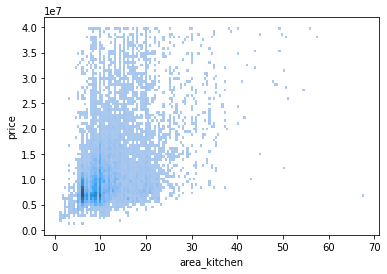

In [85]:
fig, axes = plt.subplots()
sns.histplot(x="area_kitchen",y="price", data=train_merged, ax = axes)

In [86]:
train_merged.area_living.describe()

count    17605.000000
mean        32.377262
std         16.707901
min          0.000000
25%         19.200000
50%         30.000000
75%         41.900000
max        222.000000
Name: area_living, dtype: float64

In [87]:
train_merged.loc[train_merged.area_living == 0, "area_living"] = 1

In [88]:
train_merged.area_total.describe()

count    20440.000000
mean        60.363494
std         25.984447
min          9.300000
25%         40.000000
50%         55.500000
75%         74.800000
max        343.000000
Name: area_total, dtype: float64